## Price Prediction Assignment

This assignment aims to predict house prices based on features in the dataset and using exploratory data analysis and linear regression modeling.  

I started by exploring the dataset to understand its structure, cleaned it, visualized trends, and applied machine learning models to make predictions.

## Data Import

I started by importing the necessary libraries and loading the dataset using pandas.

In [1179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  Setting Dataset URL

I pasted the dataset URL from GitHub, which contains housing data used for the price prediction task.

In [1180]:
url = 'https://raw.githubusercontent.com/DGideonnene/Axia_Assign_1/main/Housing.csv'
url

'https://raw.githubusercontent.com/DGideonnene/Axia_Assign_1/main/Housing.csv'

## Loading Dataset

I loaded the housing dataset using pandas directly from the URL into a DataFrame. 

In [1181]:
df = pd.read_csv(url)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## Data Preview

I displayed the first five, last five and random five rows and columns for an overview of the dataset structure

In [1182]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [1183]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [1184]:
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
200,4900000,4520,3,1,2,yes,no,yes,no,yes,0,no,semi-furnished
477,2940000,4960,2,1,1,yes,no,no,no,no,0,no,unfurnished
211,4900000,12900,3,1,1,yes,no,no,no,no,2,no,furnished
428,3325000,4040,2,1,1,yes,no,no,no,no,1,no,unfurnished
38,7962500,6000,3,1,4,yes,yes,no,no,yes,2,no,unfurnished


## Exploratory Data Analysis (EDA)

I explored the dataset structure further.

In [1185]:
df.shape

(545, 13)

In [1186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [1187]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


## Data Cleaning

I checked for duplicates and missing values to ensure the integrity of the data. 

In [1188]:
df.duplicated().sum()

0

In [1189]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

From this, there are no missing values nor duplicates. So, I proceeded to the next step. 

## Separating/ Identifying Columns

I separated numeric and categorical columns to guide my preprocessing steps.

In [1190]:
num_cols = df.select_dtypes(include= ['int64']).columns.tolist()
cat_cols = df.select_dtypes(include = ['object']).columns.tolist()

In [1191]:
num_cols

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [1192]:
cat_cols

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'prefarea',
 'furnishingstatus']

## Understanding Categorical Features

I explored the unique values in categorical column ['parking']

In [1193]:
df['parking'].unique

<bound method Series.unique of 0      2
1      3
2      2
3      3
4      2
      ..
540    2
541    0
542    0
543    0
544    0
Name: parking, Length: 545, dtype: int64>

## Data Visualization

I looped through both the numerical and categorical columns to visualize data.

Uni-Variate Analysis: Specifically, I used the histogram and boxplot to visualize the numerical columns to better understand the outliers and distribution. Whereas, for the categorical columns, I used the countplot for visualization. 

Worthy of note is that to prevent the visulization from being jammed together as well as ensure readability, I used the ax function, which appropriately visualizes data side by side and improves clarity. 

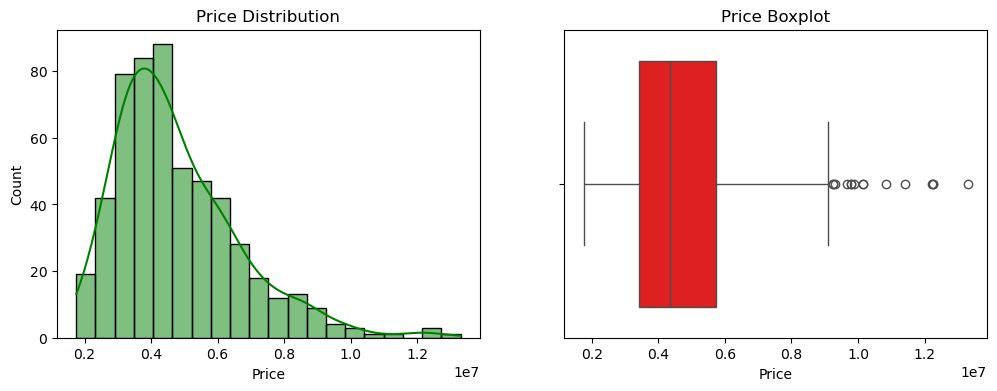

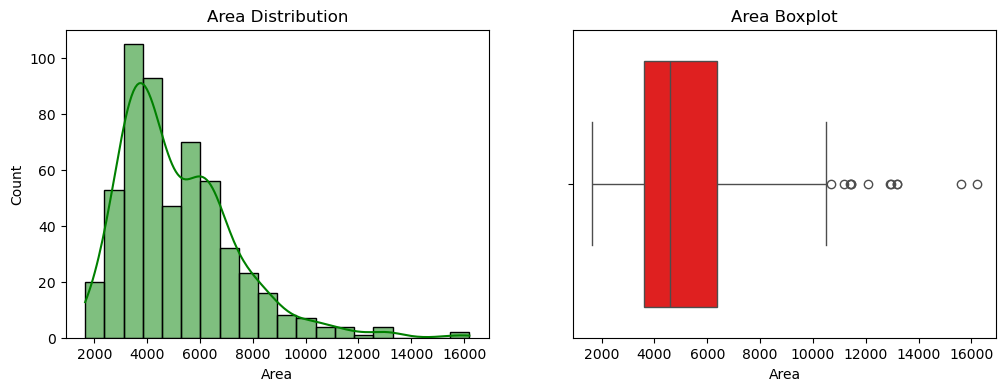

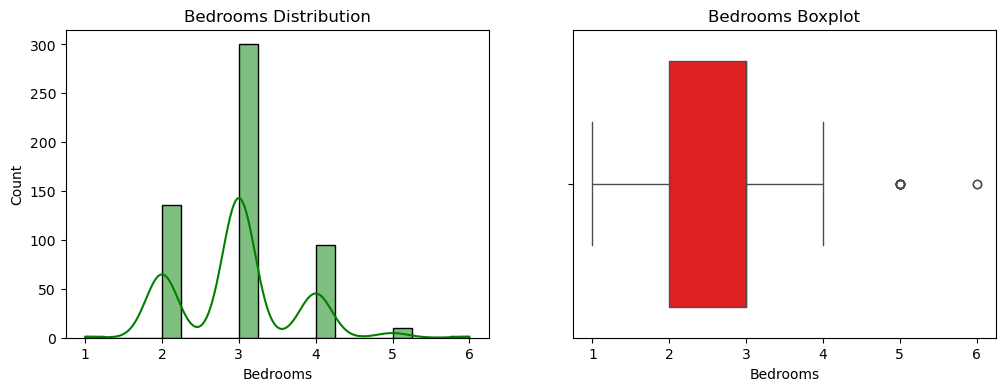

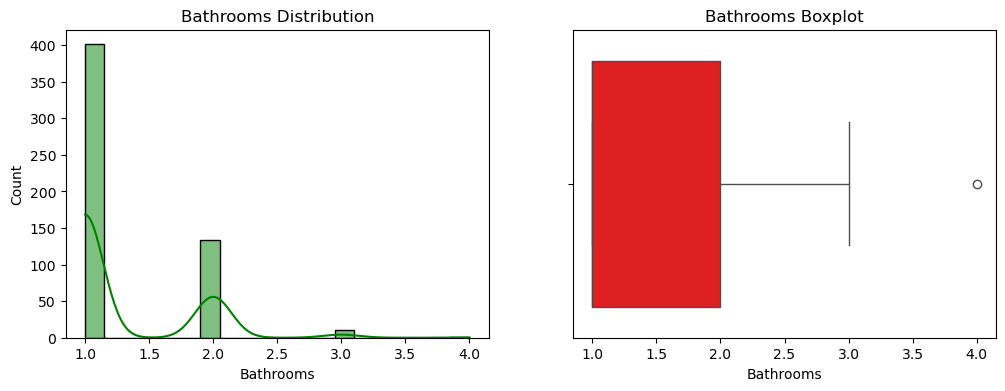

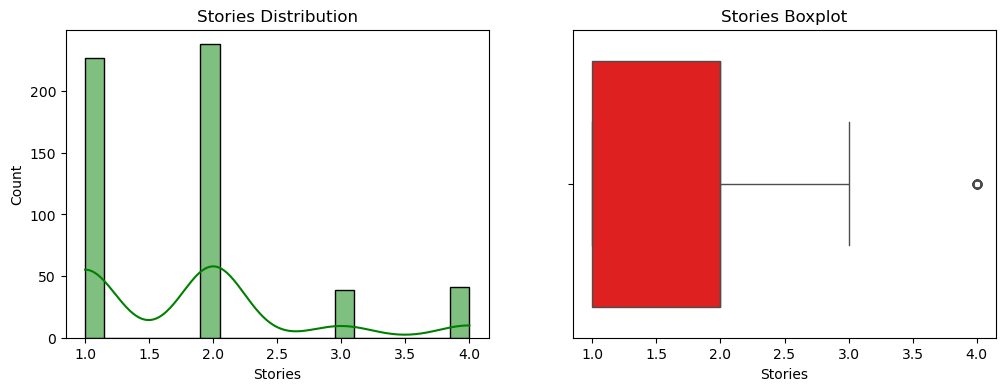

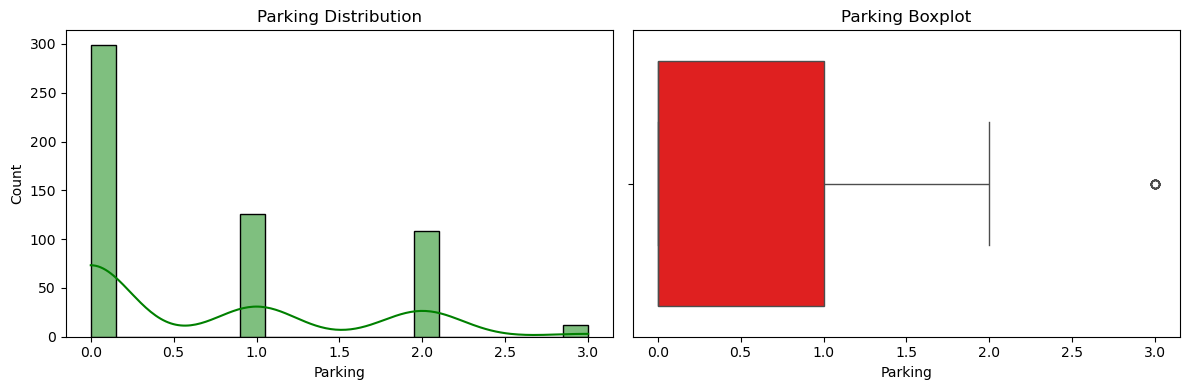

In [1194]:
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, bins=20, color='green', ax=axes[0])
    axes[0].set_title(f'{col.capitalize()} Distribution')
    axes[0].set_xlabel(col.capitalize())
    axes[0].set_ylabel('Count')

    plt.subplot(1,2,2)
    sns.boxplot(x=df[col], color='red', ax=axes[1])
    axes[1].set_title(f'{col.capitalize()} Boxplot')
    axes[1].set_xlabel(col.capitalize())
    
plt.tight_layout()
plt.show()

This visualization shows that the numerical columns (price, area, bathrooms, stories, parking) are skewed to the right, while bedroom is approximately symmetric. 

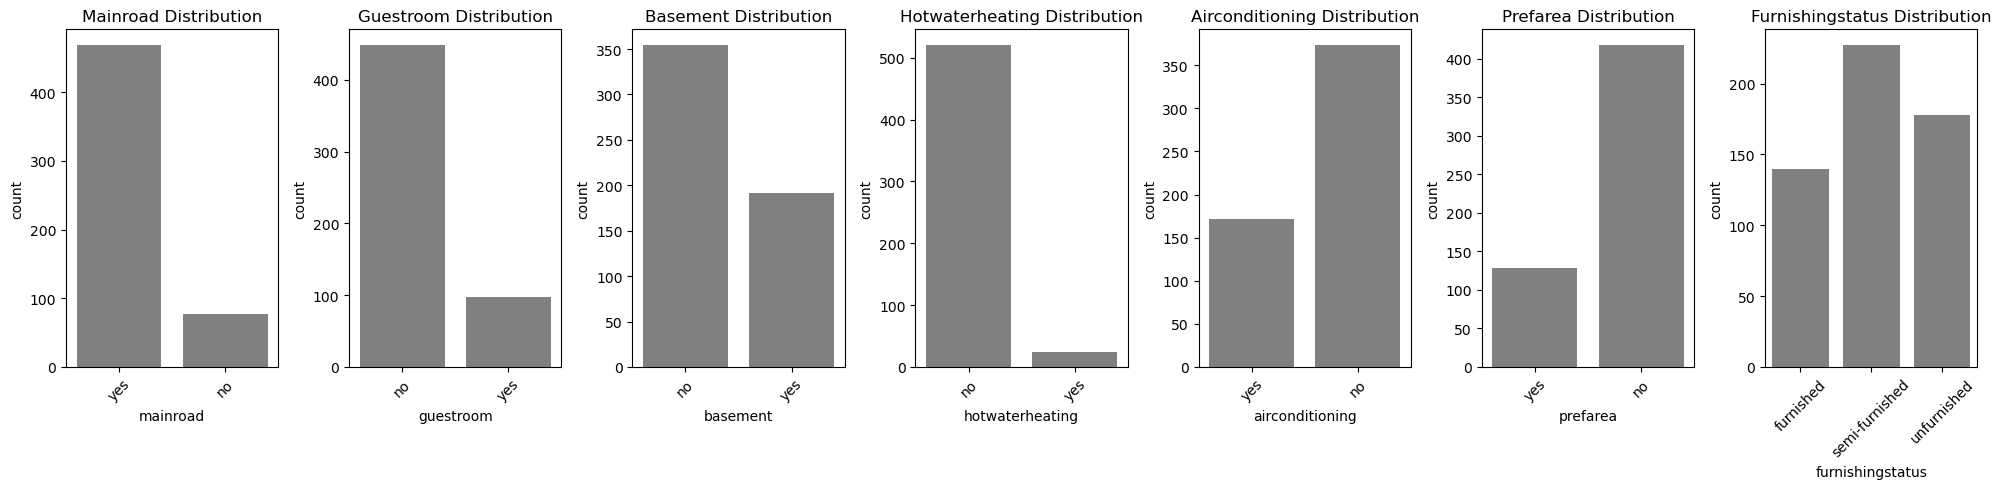

In [1195]:
fig, axes = plt.subplots(1, len(cat_cols), figsize=(20,5))

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, ax=axes[i], color='grey')
    axes[i].set_title(f'{col.capitalize()} Distribution')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

This visualization shows the distribution of the categorical variable. Please note that this is a univariate analysis. 

## Correlation Analysis 

I explored the relationships between numeric columns/variables using heatmap of their correlation matrix

In [1116]:
corr_matrix = df[num_cols].corr()

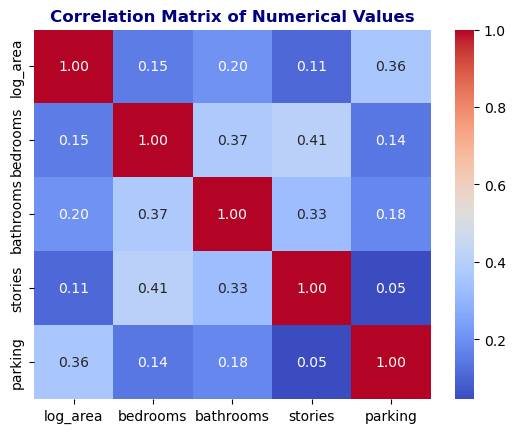

In [1117]:
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Values', fontweight = 'bold', fontsize = 12, color = 'navy')
plt.show()

The Correlation Matrix shows that:
- Price has a moderate positive correlation with area. This means that the larger the area, the higher the price.
- Price has a weak to moderate correlation with bedrooms. 
- Price has a moderate correlation with bathrooms. This means that the more the bathrooms, the higher the price.
- Price has a moderate correlation with stories.
- Price has a weak to moderate correlation with parking. This means that parking slightly influences price.


Based on this correlation, I did more visualization (Bi-Variate)

I visualized using a scatter plot to check for patterns between price versus area, price versus bathrooms, and price versus stories. To do this, I re-assigned the target variables (converted them to a list), which are area, bathrooms and price. After this, I looped through in order to visualize. 

I also visualized the numerical and categorical columns using a boxplot (price versus mainroad, price versus guestroom, price versus basement, price versus hotwaterheating, price versus airconditioning, price versus furnishingstatus).

Conclusively, I visualized the categorical and categorical columns using a stacked barplot. 

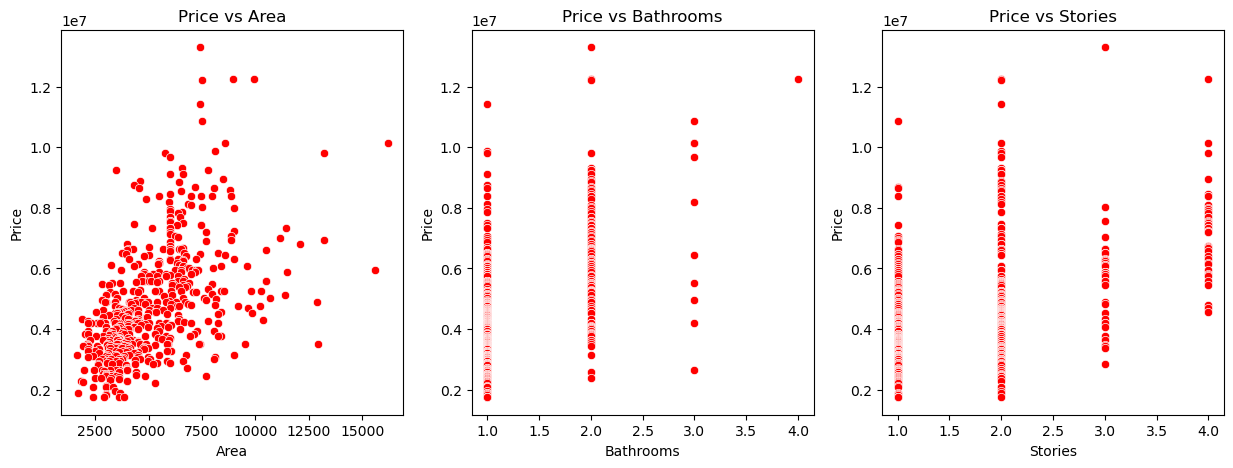

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

In [1118]:
target_variables = ['area', 'bathrooms', 'stories']

fig, axes = plt.subplots(1, len(target_variables), figsize=(15,5))

for i, col in enumerate(target_variables):
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=col, y='price', data=df, color = 'red', ax=axes[i])
    axes[i].set_title(f'Price vs {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Price')
    
plt.tight_layout()
plt.show()

The visualization shows that:

- Price versus Area: As area increases, the price also increases. Also, there are a few outliers. 
- Price versus Bathrooms: The number of bathrooms also affects the price.
- Price versus Stories: The more the stories, the higher the price but it is a weak-moderate correlation. 

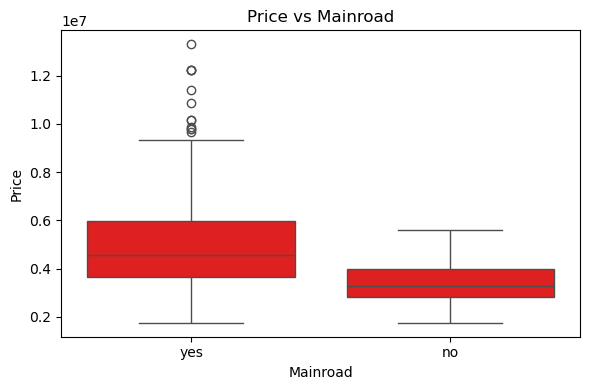

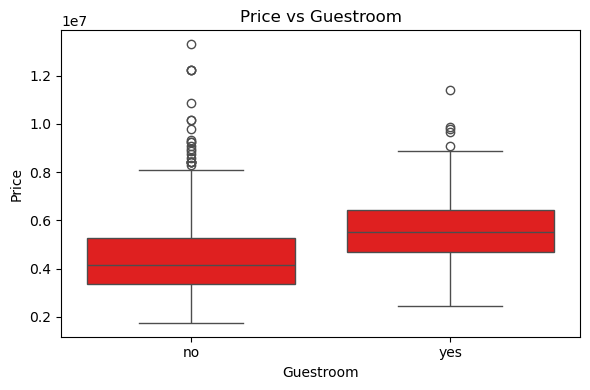

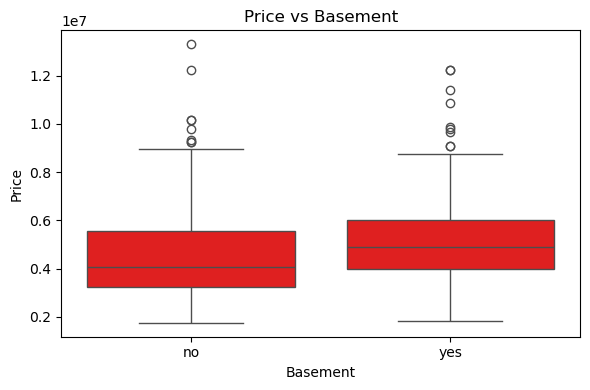

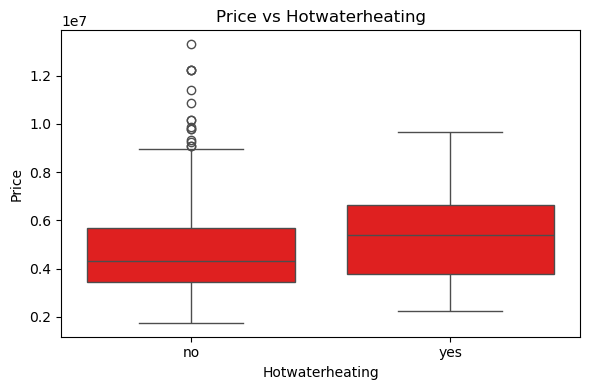

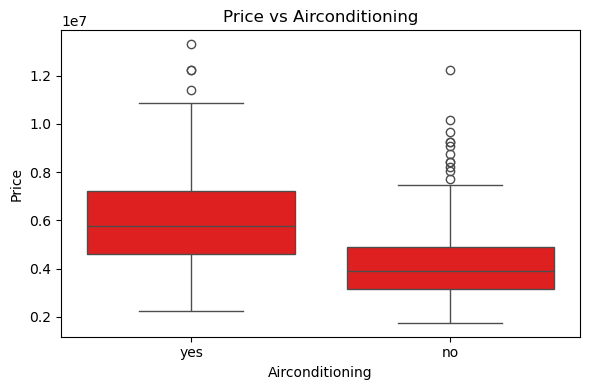

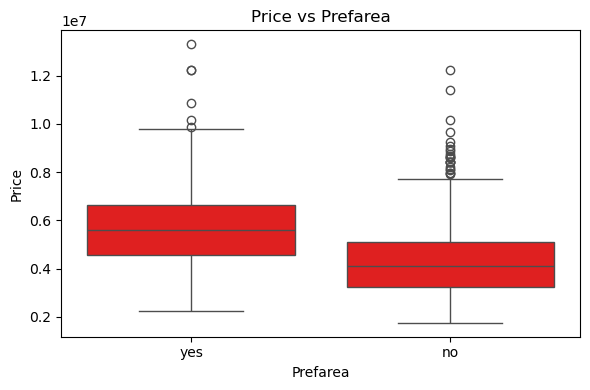

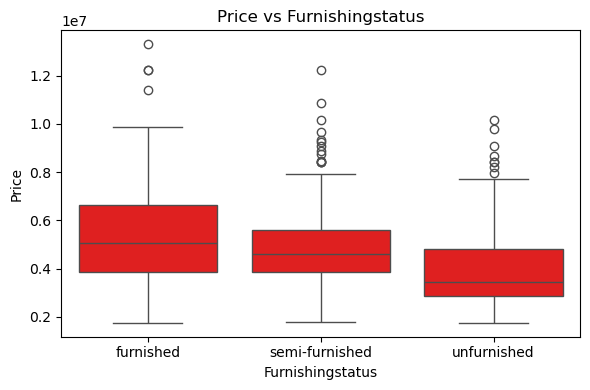

In [1130]:
for col in cat_cols:
    plt.figure(figsize = (6,4))
    sns.boxplot(x=col, y='price', data=df, color = 'red')
    plt.title(f'Price vs {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Price')
    plt.tight_layout()
    plt.show()

The visualization shows that:
- houses on the main road have higher prices than the ones not on the main road
- houses with a guestroom have higher prices
- houses with a basement have slightly higher prices
- houses with hot water heating have higher prices
- houses with air conditioning have higher prices
- houses with preferred areas have higher prices
- furnished houses have the highest price, semi-furnished and unfurnished houses have lower prices

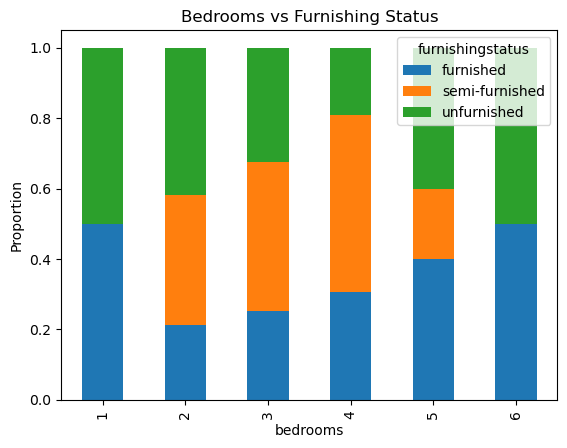

In [1196]:
pd.crosstab(df['bedrooms'], df['furnishingstatus'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Bedrooms vs Furnishing Status')
plt.ylabel('Proportion')
plt.show()

This visualization shows that:
- 1 and 6 bedrooms are usually furnished or unfurnished
- 2 - 4 bedrooms are more semi-furnished
- 5 bedrooms are mostly furnished or unfurnished with semi-funished being the least. 

## Adjusting Skewness

After visualizing the numerical columns, I transformed the price and area column for normalization. 

I also revisualized.

In [1197]:
df['log_price'] = np.log(df['price'])

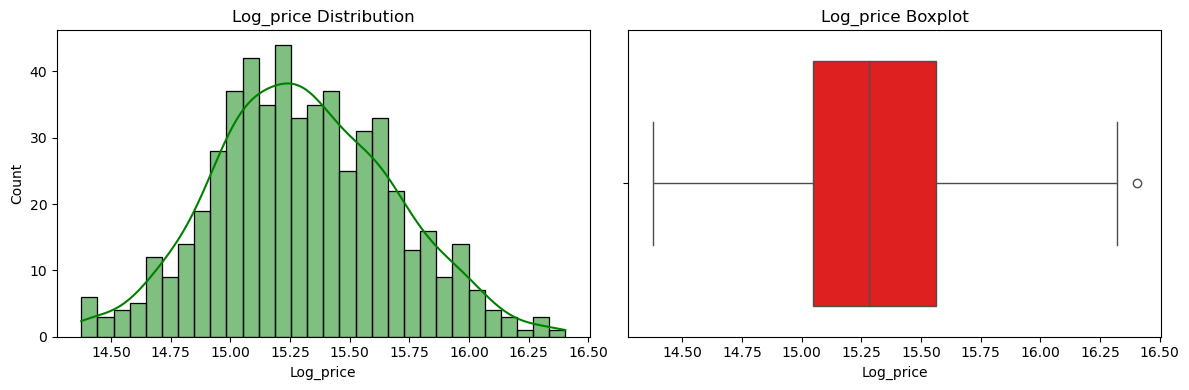

In [1198]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(x=df['log_price'], kde=True, bins=30, color='green', ax=axes[0])
axes[0].set_title(f'{'log_price'.capitalize()} Distribution')
axes[0].set_xlabel('log_price'.capitalize())
axes[0].set_ylabel('Count')

sns.boxplot(x=df['log_price'], color='red', ax=axes[1])
axes[1].set_title(f'{'log_price'.capitalize()} Boxplot')
axes[1].set_xlabel('log_price'.capitalize())

plt.tight_layout()
plt.show()

In [1199]:
df['log_area'] = np.log(df['area'])

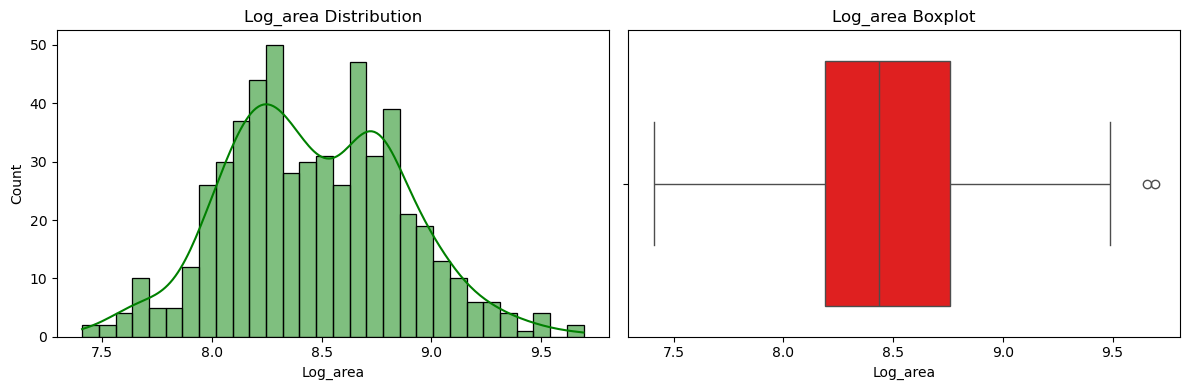

In [1200]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['log_area'], kde=True, bins=30, color='green', ax=axes[0])
axes[0].set_title(f'{'log_area'.capitalize()} Distribution')
axes[0].set_xlabel('log_area'.capitalize())
axes[0].set_ylabel('Count')

sns.boxplot(x=df['log_area'], color='red', ax=axes[1])
axes[1].set_title(f'{'log_area'.capitalize()} Boxplot')
axes[1].set_xlabel('log_area'.capitalize())

plt.tight_layout()
plt.show()

This visualization (histogram and boxplot) shows that the skewness of price and area has been transformed. 

## Correlation Analysis of Transformed Columns

I further explored the relationships between the transformed numeric columns/variables using heatmap of their correlation matrix

In [1201]:
num_cols = ['log_price', 'log_area', 'bedrooms', 'bathrooms', 'stories', 'parking']
num_cols

['log_price', 'log_area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [1202]:
corr_matrix = df[num_cols].corr()

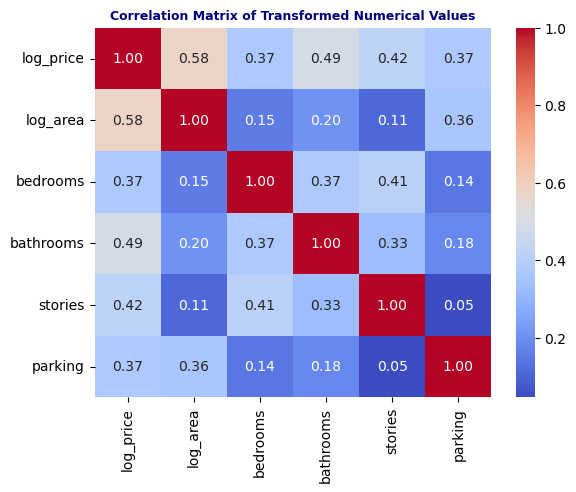

In [1203]:
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Transformed Numerical Values', fontweight = 'bold', fontsize = 9, color = 'navy')
plt.show()

The transformed correlation matrix shows that:

- (log_area) has the highest correlation with log_price, followed by (bathrooms) and (stories)
- (parking) and (bedrooms) have a moderate positive correlation with (log_price)

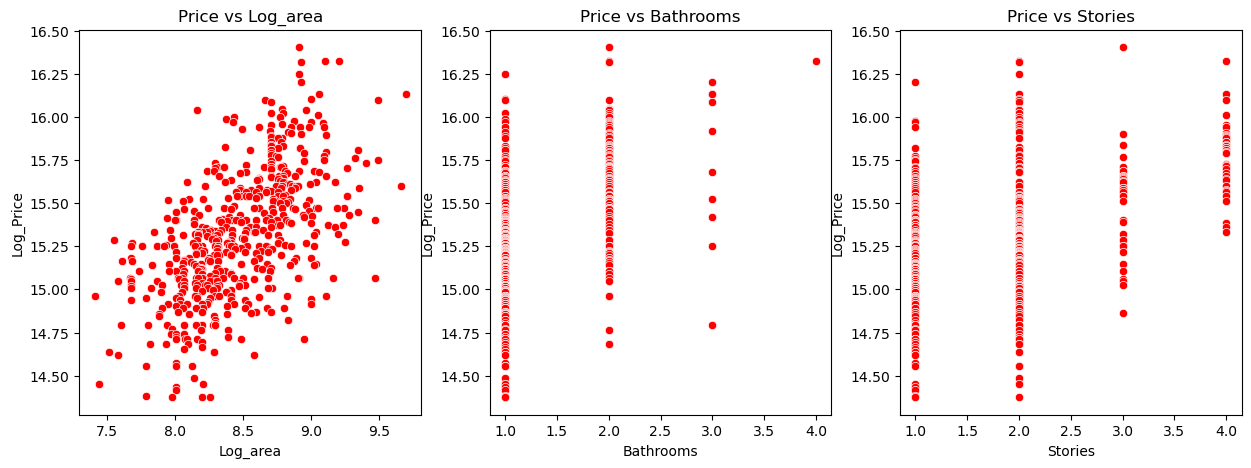

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

<Figure size 500x400 with 0 Axes>

In [1204]:
target_variables = ['log_area', 'bathrooms', 'stories']

fig, axes = plt.subplots(1, len(target_variables), figsize=(15,5))

for i, col in enumerate(target_variables):
    plt.figure(figsize=(5, 4))
    sns.scatterplot(x=col, y='log_price', data=df, color = 'red', ax=axes[i])
    axes[i].set_title(f'Price vs {col.capitalize()}')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Log_Price')
    
plt.tight_layout()
plt.show()

The visualization shows that:

- log_price versus log_area: As log_area increases, the log_price also increases. Also, there are a few outliers. 
- log_price versus Bathrooms: As the number of bathrooms increases, the log_price increases slightly.
- log_price versus Stories: The more the stories, the higher the log_price increases slightly as well. 

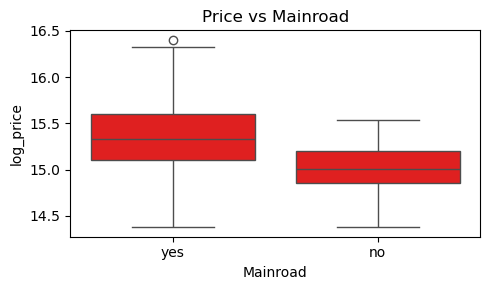

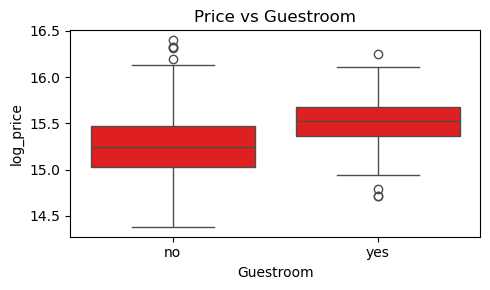

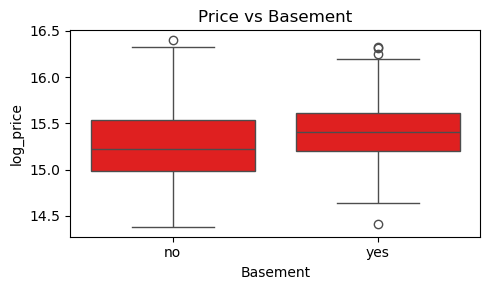

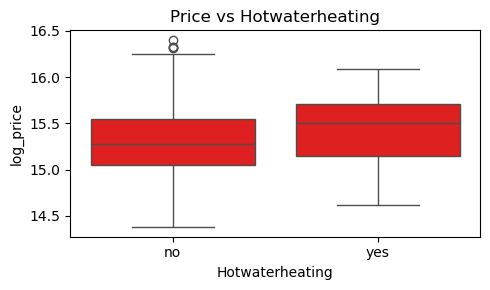

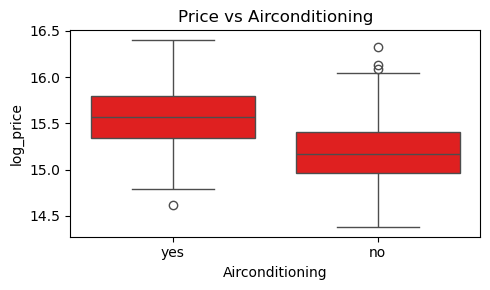

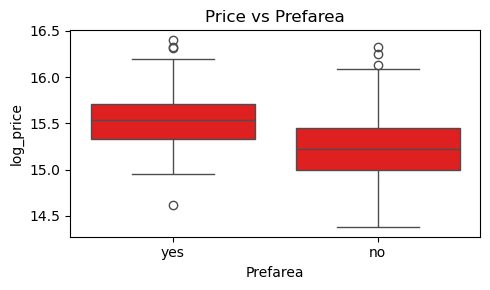

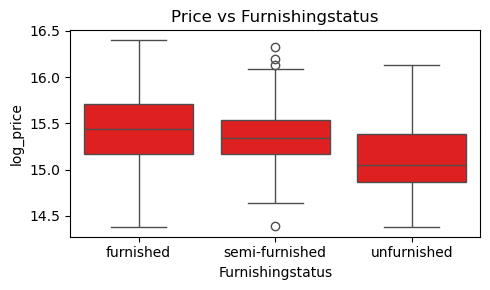

In [1205]:
for col in cat_cols:
    plt.figure(figsize = (5,3))
    sns.boxplot(x=col, y='log_price', data=df, color = 'red')
    plt.title(f'Price vs {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('log_price')
    plt.tight_layout()
    plt.show()

The visualization shows that:

- houses on the main road have a higher log_price than the ones not on the main road
- houses with a guestroom have a higher  log_price
- houses with a basement have a slightly higher log_price
- houses with hot water heating have a higher log_price
- houses with air conditioning have a higher log_price
- houses with preferred areas have a higher log_price
- furnished houses have the highest log_price, semi-furnished and unfurnished houses have lower log_prices

## Data Preprocessing

I separated the dataset into features and target variable. 

The features are data without the target column while the target is the transformed variable (log_price). I further rechecked the the number of rows and columns.

In [1206]:
features = df.drop(columns = ['price', 'log_price']) 
target =  df['log_price']

In [1207]:
features

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_area
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,8.911934
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,9.100526
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,9.206332
3,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,8.922658
4,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,8.911934
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished,8.006368
541,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished,7.783224
542,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished,8.194229
543,2910,3,1,1,no,no,no,no,no,0,no,furnished,7.975908


In [1208]:
target

0      16.403275
1      16.321036
2      16.321036
3      16.318175
4      16.250001
         ...    
540    14.414347
541    14.384879
542    14.375126
543    14.375126
544    14.375126
Name: log_price, Length: 545, dtype: float64

In [1209]:
features.shape

(545, 13)

In [1210]:
target.shape

(545,)

## Splitting

I splitted the dataset into training and test tests to evaluate the performance of the model later. 

For this, I imported the necessary library and also explored it. 

In [1211]:
from sklearn.model_selection import train_test_split

In [1212]:
train_features, test_features, train_target, test_target = train_test_split(features, target, 
                                                                            test_size = 0.2, random_state = 20)

In [1213]:
train_features.shape, test_features.shape

((436, 13), (109, 13))

In [1214]:
train_features.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_area
370,4280,2,1,1,yes,no,no,no,yes,2,no,semi-furnished,8.361708
438,4500,2,1,1,no,no,no,no,no,0,no,semi-furnished,8.411833
528,3970,1,1,1,no,no,no,no,no,0,no,unfurnished,8.286521
119,7020,3,1,1,yes,no,yes,no,yes,2,yes,semi-furnished,8.856518
7,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,9.692767


## Encoding and Scaling

I encoded the categorical columns into numbers. This is because machine learning only recognizes numerical data, while the numerical columns were scaled so they are on a similar scale and consistent. 

Also, I converted the output to a numpy array, after which I combined both numerical and categorical variables horizontally. 

Furthermore, I recalled and re-assigned the numerical columns to remove the 'price' column. 

In [1215]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [1216]:
encoder = OneHotEncoder()

In [1217]:
train_cat = encoder.fit_transform(train_features[cat_cols])
test_cat = encoder.transform(test_features[cat_cols])

In [1218]:
train_cat = train_cat.toarray()
test_cat = test_cat.toarray()

In [1219]:
num_cols = ['log_area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [1220]:
num_cols

['log_area', 'bedrooms', 'bathrooms', 'stories', 'parking']

In [1221]:
scaler = StandardScaler()

In [1222]:
train_num = scaler.fit_transform(train_features[num_cols])
test_num = scaler.transform(test_features[num_cols])

In [1223]:
train_num

array([[-0.25597083, -1.33392104, -0.56274914, -0.92057462,  1.55657729],
       [-0.1321569 , -1.33392104, -0.56274914, -0.92057462, -0.78365615],
       [-0.44169255, -2.71209539, -0.56274914, -0.92057462, -0.78365615],
       ...,
       [-2.25547232,  2.800602  , -0.56274914,  0.25992695, -0.78365615],
       [-0.21476283,  1.42242765, -0.56274914,  0.25992695,  0.38646057],
       [ 1.36507949,  0.0442533 , -0.56274914, -0.92057462,  1.55657729]])

In [1224]:
test_num

array([[ 2.17257304,  1.42242765, -0.56274914,  0.25992695,  0.38646057],
       [-1.47770578,  1.42242765,  3.36298887,  0.25992695, -0.78365615],
       [ 0.81388512,  1.42242765,  1.40011987,  0.25992695,  0.38646057],
       [-0.51750823,  0.0442533 , -0.56274914, -0.92057462, -0.78365615],
       [ 2.17688768,  0.0442533 , -0.56274914,  1.44042852,  1.55657729],
       [ 0.10825711, -1.33392104, -0.56274914, -0.92057462, -0.78365615],
       [ 0.77617242,  0.0442533 ,  1.40011987,  1.44042852, -0.78365615],
       [-0.36210268, -1.33392104,  1.40011987, -0.92057462, -0.78365615],
       [-0.1321569 , -1.33392104, -0.56274914, -0.92057462,  1.55657729],
       [ 1.40958761,  0.0442533 , -0.56274914,  0.25992695,  1.55657729],
       [-0.09943942,  0.0442533 ,  1.40011987,  0.25992695,  0.38646057],
       [ 0.06809145,  1.42242765,  1.40011987,  0.25992695,  0.38646057],
       [ 1.12140309,  0.0442533 ,  1.40011987,  2.62093009,  1.55657729],
       [ 0.57845624, -1.33392104, -0.5

In [1225]:
train_target

370    15.107494
438    14.995703
528    14.637491
119    15.598902
7      16.132984
         ...    
218    15.390357
223    15.375758
271    15.283385
474    14.905755
355    15.143381
Name: log_price, Length: 436, dtype: float64

In [1226]:
train_processed = np.hstack((train_num, train_cat))
test_processed = np.hstack((test_num, test_cat))

## Linear Regression

I built a model using LinearRegression and trained it on the processed training data. 

I imported the necessary libraries and generated predictions.

In [1227]:
from sklearn.linear_model import LinearRegression

In [1228]:
model = LinearRegression()

In [1229]:
model.fit(train_processed, train_target)

LinearRegression()

In [1230]:
train_pred = model.predict(train_processed)
test_pred = model.predict(test_processed)

In [1231]:
train_pred

array([15.27765995, 14.93256517, 14.73522017, 15.68888234, 15.79400577,
       15.56430133, 14.74372047, 15.29460088, 14.97374091, 15.83649637,
       15.61815708, 15.19084672, 15.25367791, 15.87536525, 15.19235729,
       14.86222513, 14.71475845, 15.59466778, 14.84804178, 15.57318379,
       15.1011287 , 15.08791454, 15.1335616 , 15.14011898, 15.76378728,
       15.41968559, 15.37432387, 15.14925064, 15.4725695 , 15.8343877 ,
       15.84708047, 15.64436791, 15.30627103, 15.516803  , 15.12560283,
       15.42138167, 15.12966297, 15.6234474 , 15.03568553, 15.74882313,
       15.14155272, 15.51069222, 15.02829716, 14.97682714, 15.29239611,
       15.33546117, 15.81204749, 15.06863703, 15.17423727, 15.43384574,
       15.07961359, 15.03230762, 15.06178032, 15.75772   , 15.46540449,
       14.99897444, 15.0365385 , 15.08831722, 14.95353624, 14.86714508,
       15.05954237, 14.84363041, 15.18574752, 14.90851778, 15.25712553,
       15.50145074, 14.80964511, 14.99008902, 14.92744494, 15.89

In [1232]:
train_target

370    15.107494
438    14.995703
528    14.637491
119    15.598902
7      16.132984
         ...    
218    15.390357
223    15.375758
271    15.283385
474    14.905755
355    15.143381
Name: log_price, Length: 436, dtype: float64

## Model Evaluation

After I trained the model, I evaluated it using Mean Absolute Error, Mean Squared Error, Coefficient of Determination, and Adjusted R-Squared.  

In [1233]:
from sklearn.metrics import mean_squared_error, r2_score

In [1234]:
train_mse = mean_squared_error(train_target, train_pred)
test_mse = mean_squared_error(test_target, test_pred)

In [1235]:
train_mse, test_mse

(0.04006515113153703, 0.04313250055574696)

In [1236]:
train_score = r2_score(train_target, train_pred)
test_score = r2_score (test_target, test_pred)

In [1237]:
train_score, test_score

(0.7049459872917212, 0.7055495649600798)

In [1238]:
train_target

370    15.107494
438    14.995703
528    14.637491
119    15.598902
7      16.132984
         ...    
218    15.390357
223    15.375758
271    15.283385
474    14.905755
355    15.143381
Name: log_price, Length: 436, dtype: float64

In [1239]:
train_pred

array([15.27765995, 14.93256517, 14.73522017, 15.68888234, 15.79400577,
       15.56430133, 14.74372047, 15.29460088, 14.97374091, 15.83649637,
       15.61815708, 15.19084672, 15.25367791, 15.87536525, 15.19235729,
       14.86222513, 14.71475845, 15.59466778, 14.84804178, 15.57318379,
       15.1011287 , 15.08791454, 15.1335616 , 15.14011898, 15.76378728,
       15.41968559, 15.37432387, 15.14925064, 15.4725695 , 15.8343877 ,
       15.84708047, 15.64436791, 15.30627103, 15.516803  , 15.12560283,
       15.42138167, 15.12966297, 15.6234474 , 15.03568553, 15.74882313,
       15.14155272, 15.51069222, 15.02829716, 14.97682714, 15.29239611,
       15.33546117, 15.81204749, 15.06863703, 15.17423727, 15.43384574,
       15.07961359, 15.03230762, 15.06178032, 15.75772   , 15.46540449,
       14.99897444, 15.0365385 , 15.08831722, 14.95353624, 14.86714508,
       15.05954237, 14.84363041, 15.18574752, 14.90851778, 15.25712553,
       15.50145074, 14.80964511, 14.99008902, 14.92744494, 15.89

In [1240]:
error = train_target - train_pred

In [1241]:
prediction_table = pd.DataFrame({
                    'Actual': train_target,
                    'Predicted': train_pred,
                    'Error': error
})

In [1242]:
prediction_table.sample(5)

,Actual,Predicted,Error
468,14.917451,14.900643,0.016808
313,15.225277,15.253438,-0.028161
452,14.962913,15.457743,-0.494830
435,15.006398,14.880125,0.126273
287,15.250595,15.244399,0.006196


In [1243]:
prediction_table['Error'].mean()

-2.3671177148888658e-15

In [1244]:
from sklearn.metrics import mean_absolute_error

In [1245]:
mean_absolute_error(train_target, train_pred)

0.15619967720841843

In [1246]:
from sklearn.metrics import mean_squared_error

In [1247]:
np.sqrt(mean_squared_error(train_target, train_pred))

0.20016281155983254

In [1248]:
from sklearn.metrics import r2_score

In [1249]:
r2_score(train_target, train_pred)

0.7049459872917212

In [1250]:
n = train_target.shape[0]
k = df.shape[1] - 1

In [1251]:
r = r2_score(train_target, train_pred)

In [1252]:
adj = 1 - ((1 -r) * (n - 1)) / (n-k-1)

In [1253]:
adj

0.6951342148976216

## Conclusion

- (log_area) has the strongest correlation with (log_price)
- log transformation of price and area improved the model (I previously perfromed the model on the untransformed column and got a r2 of 0.69%)
- r2 of 0.70 shows 70% variance in prices of house.